# TimeSynth

#### Get latest version

In [2]:
%%capture
!pip uninstall timesynth --yes
!pip install git+https://github.com/TimeSynth/TimeSynth.git

#### Imports

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import timesynth as ts

#### Harmonic Signals

In [3]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [4]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [5]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [6]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)

In [7]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

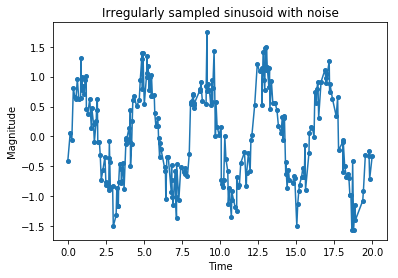

In [8]:
# Plotting the series
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

#### Harmonic Signals with Red noise

In [9]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [10]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [11]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

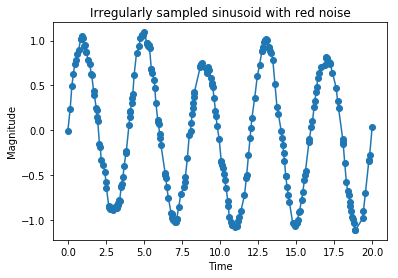

In [12]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

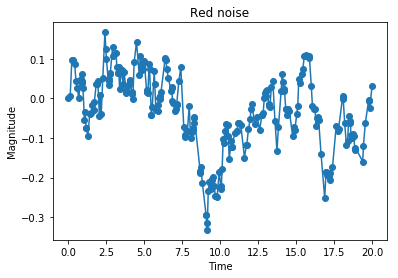

In [13]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

#### PseudoPeriodic Signals

In [14]:
# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [15]:
# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [16]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [17]:
# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

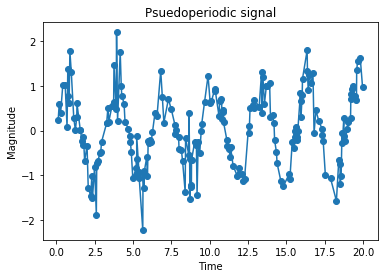

In [18]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Psuedoperiodic signal');

#### Gaussian Process signals

In [19]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)
gp_series = ts.TimeSeries(signal_generator=gp)
samples = gp_series.sample(irregular_time_samples)[0]

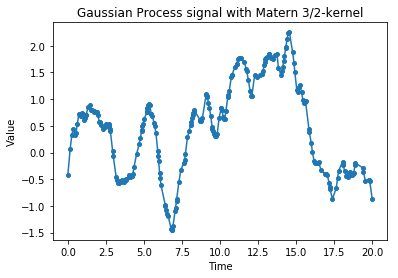

In [20]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

#### CAR model

In [21]:
car = ts.signals.CAR(ar_param=0.9, sigma=0.01)
car_series = ts.TimeSeries(signal_generator=car)
samples = car_series.sample(irregular_time_samples)

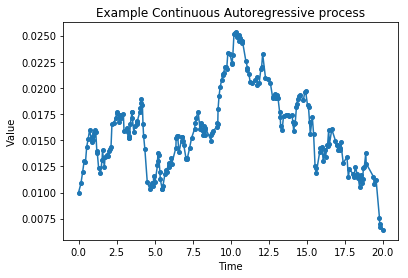

In [22]:
plt.plot(irregular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

#### AR model for regularly sampled timestamps

In [23]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling regular time samples
regular_time_samples = time_sampler.sample_irregular_time(num_points=500)

In [24]:
# Initializing AR(2) model
ar_p = ts.signals.AutoRegressive(ar_param=[1.5, -0.75])
ar_p_series = ts.TimeSeries(signal_generator=ar_p)
samples = ar_p_series.sample(regular_time_samples)

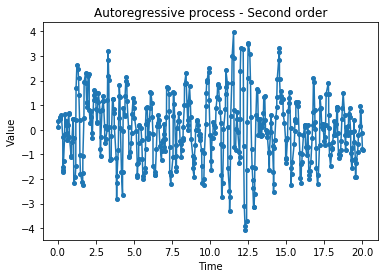

In [25]:
plt.plot(regular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive process - Second order');

#### Mackey-Glass signals

In [5]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=600)
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=800, keep_percentage=50)

In [6]:
mg = ts.signals.MackeyGlass()
noise = ts.noise.GaussianNoise(std=0.1)
mg_series = ts.TimeSeries(signal_generator=mg, noise_generator=noise)
mg_samples, mg_signals, mg_errors = mg_series.sample(irregular_time_samples)

AssertionError: You need to add at least two past points first.

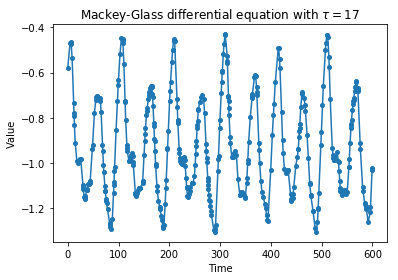

In [28]:
plt.plot(irregular_time_samples, mg_signals, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass differential equation with $\\tau=17$');

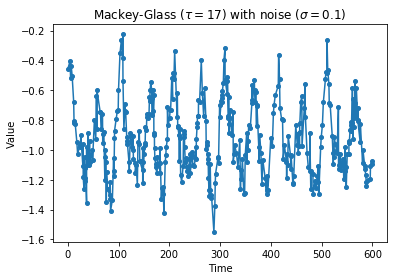

In [29]:
plt.plot(irregular_time_samples, mg_samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass ($\\tau=17$) with noise ($\\sigma = 0.1$)');

#### NARMA series

Note: only regular sampled timestamps supported

In [30]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=500)
# Sampling irregular time samples
times = time_sampler.sample_regular_time(resolution=1.)

In [31]:
# Take Samples
narma_signal = ts.signals.NARMA(order=10)
series = ts.TimeSeries(narma_signal)
samples, _, _ = series.sample(times)

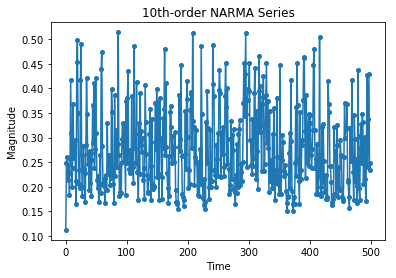

In [32]:
# Plotting the series
plt.plot(times, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('10th-order NARMA Series');